In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

def show_digit_image(data):
    """Show a digit as an image.
    
    Arguments
    data -- The image data.
    """
    fig, ax = plt.subplots()
    ax.imshow(data.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([]);

# The following code is a modification of the code found here:
# https://stackoverflow.com/questions/35651932/plotting-img-with-matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
def imscatter(x, y, images, cmap=plt.cm.gray_r, ax=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, images):
        im = OffsetImage(image, zoom=zoom, cmap=cmap, interpolation='nearest')
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# The following code is a modification of the code found here:
# https://stackoverflow.com/questions/35651932/plotting-img-with-matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(
    x,
    y,
    images,
    cmap=plt.cm.gray_r,
    ax=None,
    zoom=1
):
    """Do a scatter plot with images instead of points.
    
    Arguments
    x      -- The x coordinates.
    y      -- The y coordinates.
    images -- The images. Must be of shape (x.shape[0], d, d).
    
    Keyword Arguments
    cmap   -- A color map.
    ax     -- An axes object to plot on.
    zoom   -- How much to zoom.
    """
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, images):
        im = OffsetImage(
            image,
            zoom=zoom,
            cmap=cmap,
            interpolation='nearest'
        )
        ab = AnnotationBbox(
            im,
            (x0, y0),
            xycoords='data',
            frameon=False
        )
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# Clustering High-dimensional Data

## Objectives

+ Combine principal component analysis with k-means to solve high-dimensional clustering problems

In this hands-on activity we are going to cluster the MNIST dataset.
We cannot apply K-means directly on it because of its high-dimensionality. If we did, we would get garbage.
Instead, we are going to first reduce the dimensionality of MNIST using PCA to two dimensions and then we will apply K-means on the principal components.

Note that, in contrast to the previous hands-on activity, we are going to work with the entire training set and not just one digit.
So, we know that there are 10 clusters (the digits from 0 to 9).
Let's see if the process we follow identifies clusters that correspond to digits...
Here we go. First, download and load the MNIST data:

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split data into train partition and test partition
np.random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

Perfortm PCA on the entire data set keep two principal components:

In [3]:
from sklearn.decomposition import PCA

pca = PCA(
    n_components=2,
    whiten=True
).fit(x_train)

That's it. Let's now visualize the principal components:

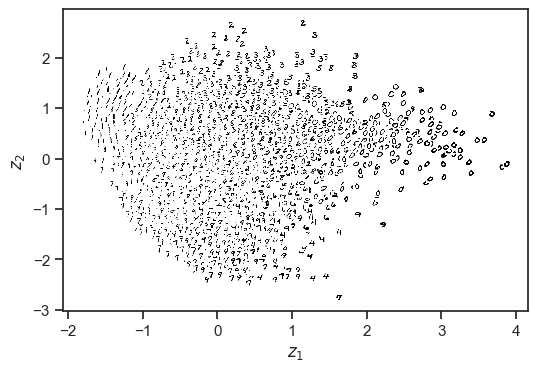

In [4]:
Z = pca.transform(x_train[:3000])

fig, ax = plt.subplots()
imscatter(
    Z[:, 0],
    Z[:, 1],
    x_train[:3000].reshape((3000, 28, 28)),
    ax=ax,
    zoom=0.2
)
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$');

You can visually observe that PCA somewhat separates the digists.
It's not perfect (and you can do better with non-linear dimensionality reduction techniques), but it will do for now.

Now it's time for K-means:

In [5]:
from sklearn.cluster import KMeans

cl = KMeans(n_clusters=10).fit(Z)

Let's visualize the clusters:

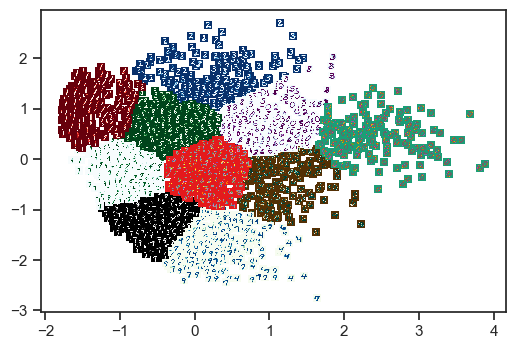

In [6]:
DIGIT_COLORS = [
    'Greys_r',
    'Blues_r',
    'BrBG',
    'BuGn',
    'BuPu',
    'Greens_r',
    'Dark2',
    'GnBu',
    'Reds_r',
    'Set1',
    'Spectral'
]

fig, ax = plt.subplots()
for i, c in enumerate(DIGIT_COLORS):
    idx = cl.labels_[:3000] == i
    imscatter(
        Z[:3000][idx, 0],
        Z[:3000][idx, 1],
        x_train[:3000][idx].reshape((sum(idx), 28, 28)),
        cmap=c,
        ax=ax,
        zoom=0.2
    );

This is nice! Observe that the the clusters look very reasonable.
Again, they are not perfect but the make sense.
Even in the cases that we know are not classified correctly, the errors are not ridiculously bad. As a matter of fact, the results are quite impressive if one takes into account that the algorithm we have put together does not know what digits are...

Okay. Now let's look at the cluster centers a bit more closely.
Let's visualize them as images.

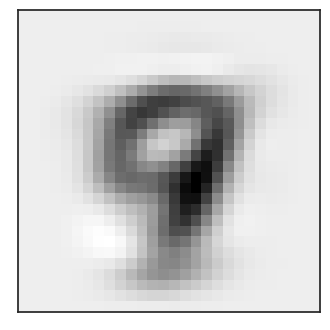

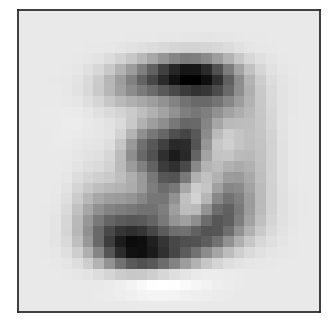

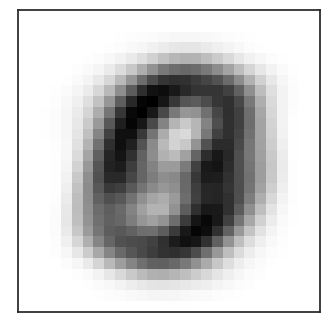

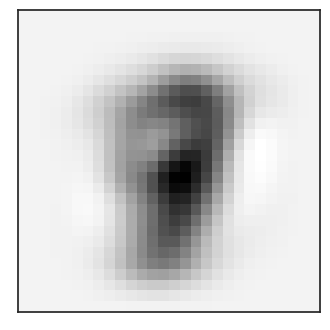

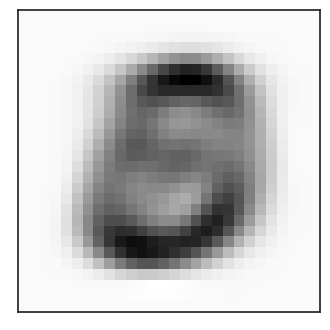

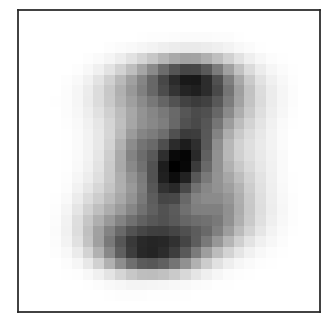

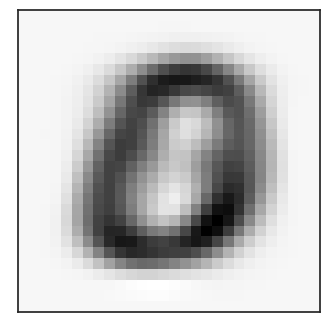

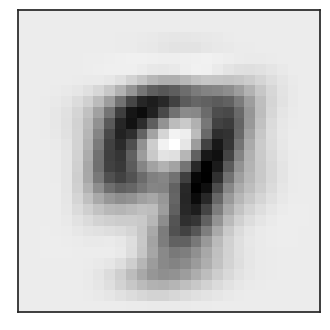

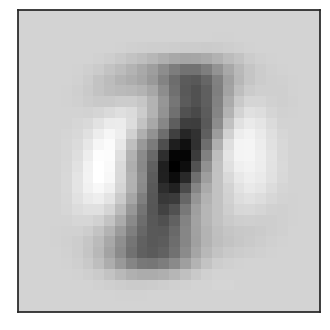

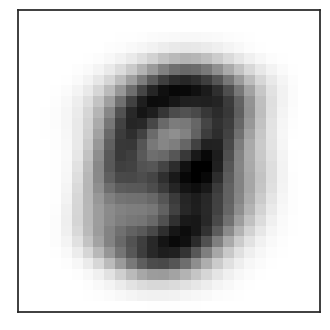

In [7]:
for i in range(10):
    show_digit_image(
        pca.inverse_transform(
            cl.cluster_centers_[i:(i+1), :]
        )
    )

### Questions

+ Which cluster centers are digits and which aren't digits? Pick one of the non-digists clusters and figure out where it is. You can do this by looking at ``cl.centers_`` to identify the coordinates of the center. Why was it picked? Does its shape make sense now?

+ Repeat the analysis above but using 3 principal components (instead of 2). (Note that the 2D visualization of the principal components will not make much sense now, so take it with a grain of salt.) Pay special attention the identified cluster centers as images. Better or worse than before?

+ Repeat the analysis with 5 principal components.

+ Repeat the analysis with 200 principal components.